In [1]:
#pip install seaborn

# Import Libraries

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [45]:
# Raw dataset drop NA
df = pd.read_csv("../resources/train_predict.csv")
# Drop the null columns where all values are null
df1 = df.dropna(axis='columns', how='all')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
#Reviewing the % of null values
100*df1.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [47]:
# Drop the null rows data cleaning, making all column headers lowercase
loan_df = df.dropna()
loan_df.columns=df.columns.str.lower()
loan_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [48]:
#Update column names
loan_df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed'
            , 'income', 'co_income'
            , 'loan_amount', 'loan_term', 'credit_history', 'property_area', 'loan_status']

In [49]:
#Test data_df after drop NAN
loan_df.dtypes

loan_id            object
gender             object
married            object
dependents         object
education          object
self_employed      object
income              int64
co_income         float64
loan_amount       float64
loan_term         float64
credit_history    float64
property_area      object
loan_status        object
dtype: object

In [50]:
loan_df.shape

(480, 13)

In [51]:
#Reviewing data
loan_df['dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [52]:
#Reviewing data
loan_df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
#Reviewing data
loan_df['loan_term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [54]:
#Reviewing data
loan_df['credit_history'].unique()

array([1., 0.])

In [55]:
loan_df.describe()

,income,co_income,loan_amount,loan_term,credit_history
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Select your features (columns)

In [56]:
# Set features. This will also be used as your x values. Removed 'loan_id', 'property_area'
loan_features_df = loan_df[['gender', 'married', 'dependents', 'education','self_employed'
            , 'income', 'co_income'
            , 'loan_amount', 'loan_term', 'credit_history', 'loan_status']]
loan_features_df.head()

,gender,married,dependents,education,self_employed,income,co_income,loan_amount,loan_term,credit_history,loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y


<AxesSubplot:xlabel='count', ylabel='gender'>

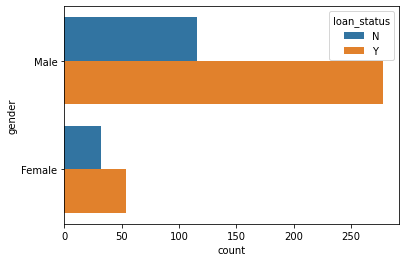

In [70]:
sns.countplot(y='gender', hue ='loan_status',data =loan_features_df)

<AxesSubplot:xlabel='count', ylabel='married'>

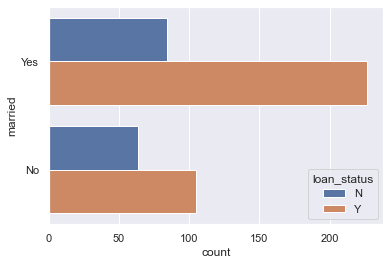

In [82]:
sns.countplot(y='married', hue ='loan_status',data =loan_features_df)

# Create a Train Test Split

Use `loan_status` for the y values

In [83]:
y = loan_features_df[["loan_status"]] 
X = loan_features_df.drop(columns=["loan_status"])
print(X.shape, y.shape)

(480, 10) (480, 1)


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [67]:
# encoded_df = pd.get_dummies(X, columns=["gender", "married", "education","self_employed"])
# encoded_df.head()

# Pre-processing

Scale the data and perform some feature selection

In [64]:
# Scale Data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

ValueError: could not convert string to float: 'Male'

In [37]:
# Scale Data
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

c:\users\dawn\anaconda3\envs\pythonadv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
y_train_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# Train the Model



In [36]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train.values.ravel())

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

NameError: name 'X_train_scaled' is not defined

In [10]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.50      0.79      0.61       422
     CONFIRMED       0.55      0.22      0.32       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.75      1748
     macro avg       0.68      0.67      0.64      1748
  weighted avg       0.75      0.75      0.73      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 2, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [12]:
# Train the model with GridSearch
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.791, total=  52.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.787, total=  56.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.778, total=  46.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.791, total=  50.5s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.778, total=  49.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.791, total=  54.6s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.787, total=  57.9s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.778, total=  45.9s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.791, total=  48.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 103.5min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [14]:
#print params, scores
print(grid.best_params_)
print(grid.best_score_)

NameError: name 'grid' is not defined

# Save the Model

In [10]:
import joblib

In [13]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
filename = 'finalized_Plant_model1.sav'
joblib.dump(model, filename)
 


NameError: name 'model' is not defined

In [12]:
#To be done later
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test_categorical)
print(result)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets